In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import MultiModeSystem, plot_full_evolution, MultiModeSystem, time_func, MultiModeError
import numpy as np
from timeit import timeit

# Single Mode System

In [3]:
# single mode system
omegas = [2*np.pi*1]
kappas = [2*np.pi*0.001]
gammas = [2*np.pi*0.002]
kerrs = [2*np.pi*0.001]
couplings = []
system = MultiModeSystem(params={"omegas":omegas, "kappas":kappas,"gammas":gammas,"kerrs":kerrs,"couplings":couplings})
x_0 = np.array([1,0])
ts = np.linspace(0, 1, 1001)

In [4]:
X = system.trapezoidal(x_0, ts)

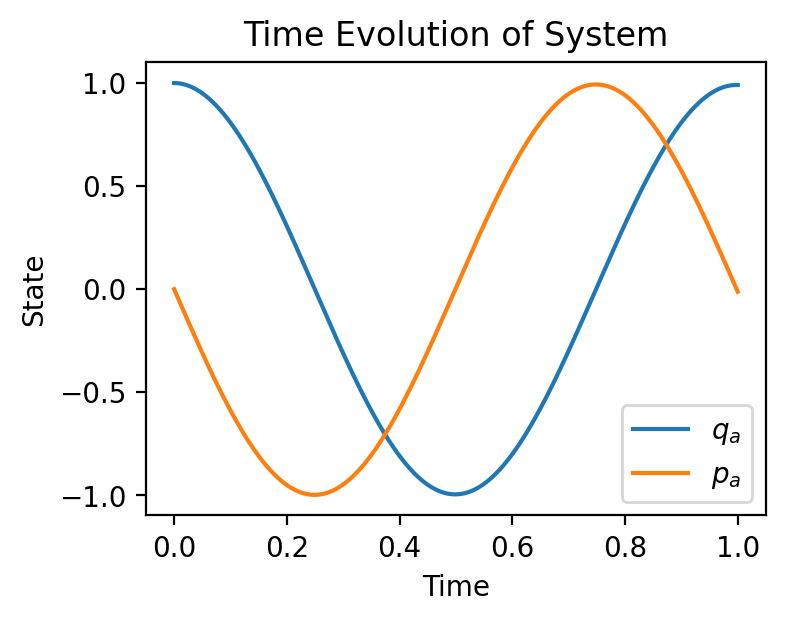

In [5]:
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

## Error Analysis

In [16]:
params_error = {"omegas":[2*np.pi*.05]}
error_analysis = MultiModeError(system, params_error)

Using the `MultiModeError` analysis class, we can sample different values for each omega given the uncertainty (i.e. 1 standard deviation) in each omega measurement and assuming a gaussian distribution. 

In [17]:
error_analysis.run("trapezoidal", x_0, ts, num_samples=100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.57it/s]


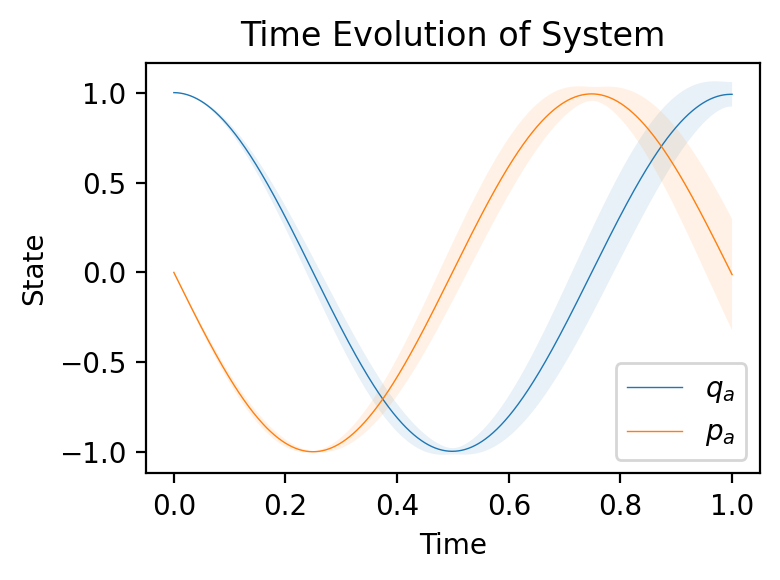

In [23]:
_ = error_analysis.plot(ts, labels=["$q_a$","$p_a$"], lw=.5)